In [445]:
#import statements
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn as skl
import warnings

warnings.filterwarnings("ignore")

#### 1. Problem framing — target, metric, baseline you’re beating.

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

**I am going to find a correlation plot for all variables to figure out which attributes are most correlated with churn (yes/no). From there, I'll develop focused customer retention programs based on which demographics have high churn, which services the churn group have, and customer account information.**

#### 2. Data hygiene — types, missingness, outliers, leakage check; document all fixes.

In [446]:
filepath = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(filepath)
df.dtypes # everything categorical except SeniorCitizen, tenure, and MonthlyCharges are numerical

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [447]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [448]:
# need to turn TotalCharges into numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors = 'coerce')

In [449]:
df.dtypes # fixed - TotalCharges now float

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [451]:
df.isna().sum() # since TotalCharges has 11 null values, I will drop those from dataset

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [452]:
df.dropna(inplace = True)

In [453]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [454]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [455]:
df.info() # all good now!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### 3. EDA — 3–4 plots max; tie each to a hypothesis.

In [456]:
# first drop id column

df = df.drop('customerID', axis=1)

In [457]:
# categorical vars plots

num_vars = df.select_dtypes(include = 'number').columns.tolist()
cat_vars = df.select_dtypes(exclude = 'number').columns.tolist()

In [458]:
cat_vars

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

first let's visualize distribution for categorical variables

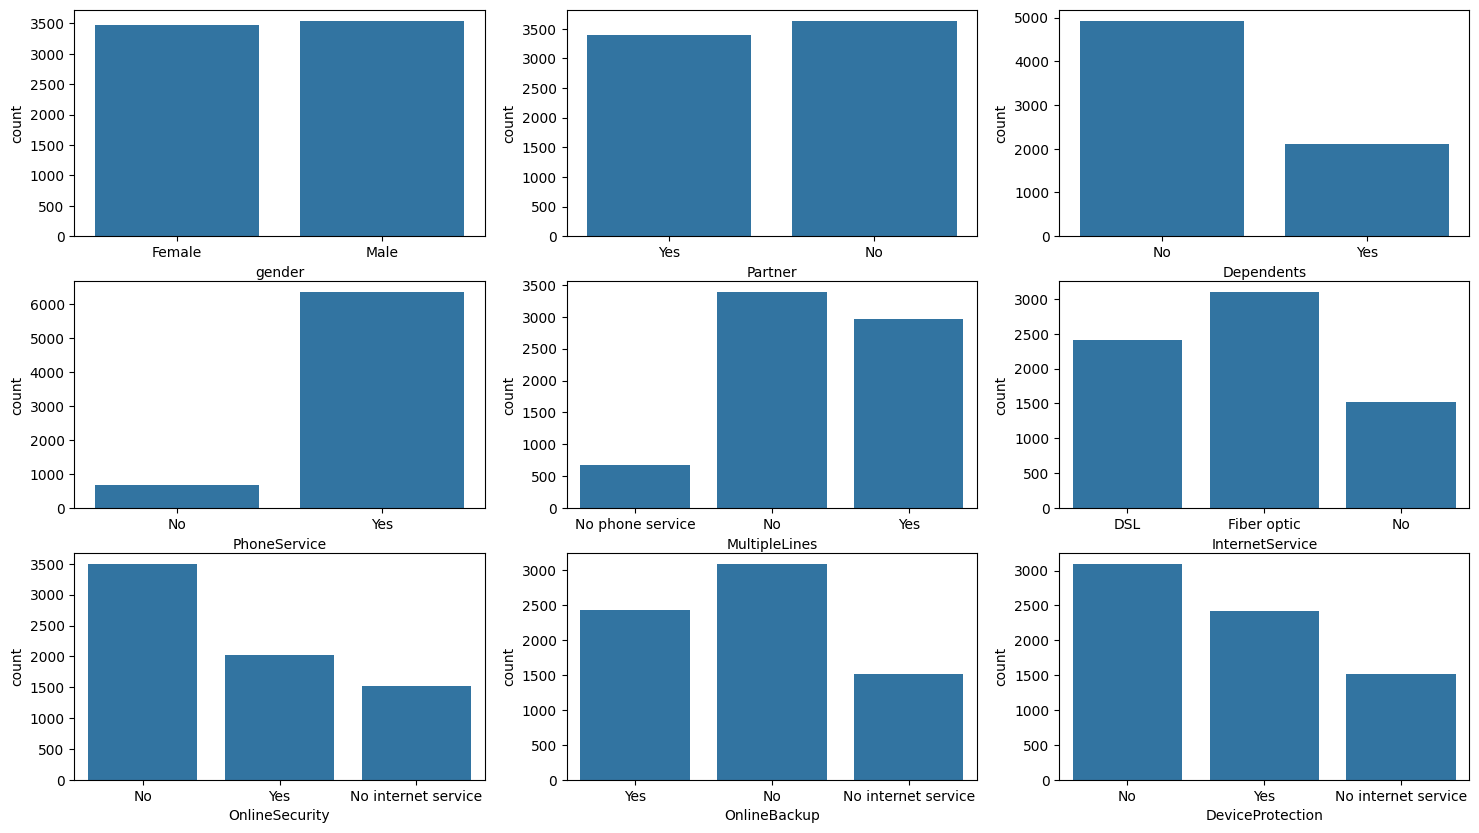

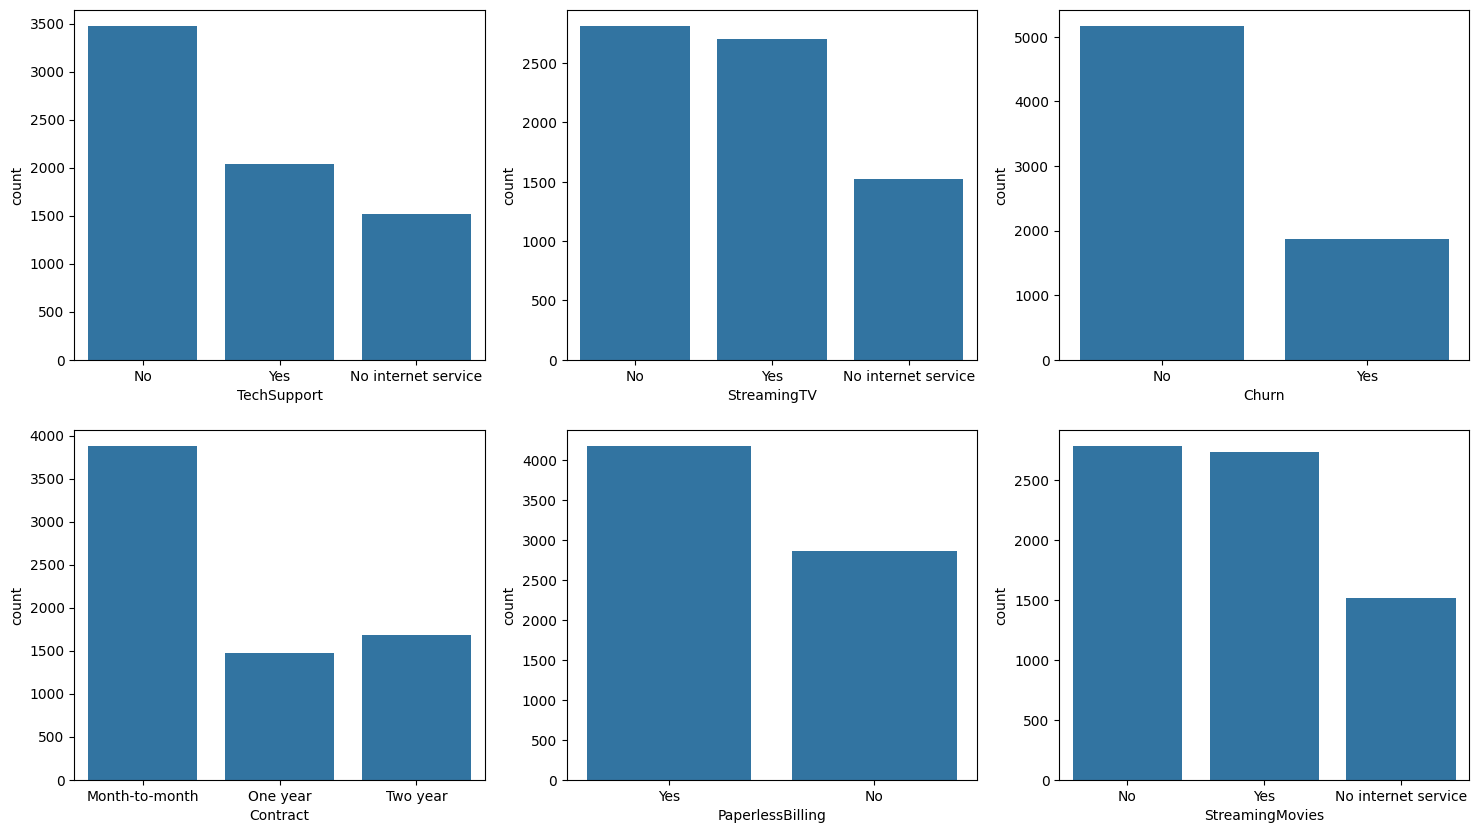

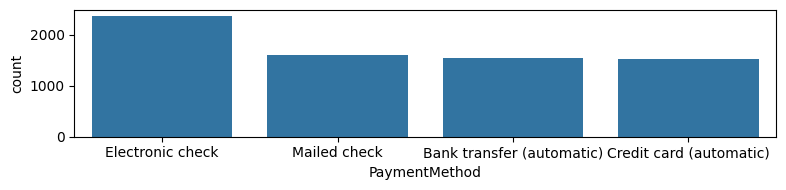

In [459]:
# categorical attributes

fig, axes = plt.subplots(figsize=(18, 10), nrows=3, ncols=3)
sns.countplot(x="gender", data=df, ax=axes[0][0])
sns.countplot(x="Partner", data=df, ax=axes[0][1])
sns.countplot(x="Dependents", data=df, ax=axes[0][2])
sns.countplot(x="PhoneService", data=df, ax=axes[1][0])
sns.countplot(x="MultipleLines", data=df, ax=axes[1][1])
sns.countplot(x="InternetService", data=df, ax=axes[1][2])
sns.countplot(x="OnlineSecurity", data=df, ax=axes[2][0])
sns.countplot(x="OnlineBackup", data=df, ax=axes[2][1])
sns.countplot(x="DeviceProtection", data=df, ax=axes[2][2])

fig2, axes2 = plt.subplots(figsize=(18, 10), nrows=2, ncols=3)
sns.countplot(x="TechSupport", data=df, ax=axes2[0][0])
sns.countplot(x="StreamingTV", data=df, ax=axes2[0][1])
sns.countplot(x="Churn", data=df, ax=axes2[0][2])
sns.countplot(x="Contract", data=df, ax=axes2[1][0])
sns.countplot(x="PaperlessBilling", data=df, ax=axes2[1][1])
sns.countplot(x="StreamingMovies", data=df, ax=axes2[1][2])

fig3, axes3 = plt.subplots(figsize=(8, 2))
sns.countplot(x="PaymentMethod", data=df, ax=axes3)
fig3.tight_layout()

proportion breakdowns to see outliers quantitatively

In [460]:
for col in cat_vars:
    display(f"{col}", df[col].value_counts(normalize=True).round(3))

'gender'

Male      0.505
Female    0.495
Name: gender, dtype: float64

'Partner'

No     0.517
Yes    0.483
Name: Partner, dtype: float64

'Dependents'

No     0.702
Yes    0.298
Name: Dependents, dtype: float64

'PhoneService'

Yes    0.903
No     0.097
Name: PhoneService, dtype: float64

'MultipleLines'

No                  0.481
Yes                 0.422
No phone service    0.097
Name: MultipleLines, dtype: float64

'InternetService'

Fiber optic    0.440
DSL            0.344
No             0.216
Name: InternetService, dtype: float64

'OnlineSecurity'

No                     0.497
Yes                    0.287
No internet service    0.216
Name: OnlineSecurity, dtype: float64

'OnlineBackup'

No                     0.439
Yes                    0.345
No internet service    0.216
Name: OnlineBackup, dtype: float64

'DeviceProtection'

No                     0.440
Yes                    0.344
No internet service    0.216
Name: DeviceProtection, dtype: float64

'TechSupport'

No                     0.494
Yes                    0.290
No internet service    0.216
Name: TechSupport, dtype: float64

'StreamingTV'

No                     0.399
Yes                    0.384
No internet service    0.216
Name: StreamingTV, dtype: float64

'StreamingMovies'

No                     0.395
Yes                    0.388
No internet service    0.216
Name: StreamingMovies, dtype: float64

'Contract'

Month-to-month    0.551
Two year          0.240
One year          0.209
Name: Contract, dtype: float64

'PaperlessBilling'

Yes    0.593
No     0.407
Name: PaperlessBilling, dtype: float64

'PaymentMethod'

Electronic check             0.336
Mailed check                 0.228
Bank transfer (automatic)    0.219
Credit card (automatic)      0.216
Name: PaymentMethod, dtype: float64

'Churn'

No     0.734
Yes    0.266
Name: Churn, dtype: float64

does not seem to be any outliers for categorical variables - no like minority values across categorical variables

In [461]:
# numerical vars plots
num_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

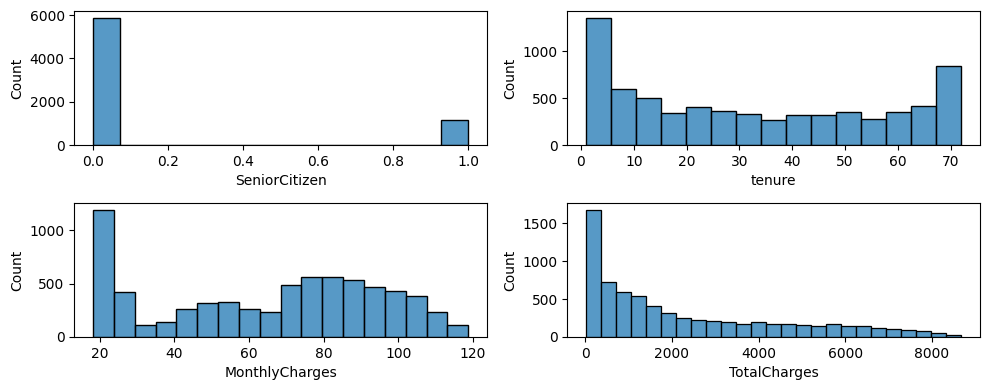

In [462]:
fig, axes = plt.subplots(figsize=(10, 4), nrows = 2, ncols = 2)
sns.histplot(x = "SeniorCitizen", data = df, ax = axes[0][0])
sns.histplot(x = "tenure", data = df, ax = axes[0][1])
sns.histplot(x = "MonthlyCharges", data = df, ax = axes[1][0])
sns.histplot(x = "TotalCharges", data = df, ax = axes[1][1])
fig.tight_layout()

numerical variables also seem normal, TotalCharges is skewed with outliers to the right so could consider cutting off but will keep for now.

now time to make correlation plot

want to convert cat into num so i can get a corr plot to see all var corr with churn

In [463]:
# gender: Male (0) Female (1)
# Partner Yes No
# Dependents Yes No
# PhoneService Yes No
# Churn Yes No
# PaperlessBilling Yes No
# Contract: Month-to-month(0)/One year(1)/Two year(2)

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)

df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1}).astype(int)
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1}).astype(int)
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1}).astype(int)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1}).astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1}).astype(int)

df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2}).astype(int)

In [464]:
df.dtypes # still need to convert MultipleLines, InternetService, OnlineSecurity, OnlineBackup,
            # DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaymentMethod
            

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [465]:
# MultipleLines: Yes, No, No phone service
# OnlineSecurity: No, Yes, No internet service
# OnlineBackup: Yes, No, No internet service
# DeviceProtection: No, Yes, No internet service
# TechSupport: No, Yes, No internet service
# StreamingTV: No, Yes, No internet service
# StreamingMovies: No, Yes, No internet service

df['MultipleLines'] = pd.Categorical(df['MultipleLines'], categories=['No phone service','No','Yes'])
df['OnlineSecurity'] = pd.Categorical(df['OnlineSecurity'], categories=['No internet service','No','Yes'])
df['OnlineBackup'] = pd.Categorical(df['OnlineBackup'], categories=['No internet service','No','Yes'])
df['DeviceProtection'] = pd.Categorical(df['DeviceProtection'], categories=['No internet service','No','Yes'])
df['TechSupport'] = pd.Categorical(df['TechSupport'], categories=['No internet service','No','Yes'])
df['StreamingTV'] = pd.Categorical(df['StreamingTV'], categories=['No internet service','No','Yes'])
df['StreamingMovies'] = pd.Categorical(df['StreamingMovies'], categories=['No internet service','No','Yes'])

# InternetService: DSL, Fiber optic, No
# PaymentMethod: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
df['InternetService'] = pd.Categorical(df['InternetService'], categories=['No','DSL','Fiber optic'])
df['PaymentMethod'] = pd.Categorical(df['PaymentMethod'], categories=['Electronic check', 'Mailed check',
                                                                      'Bank transfer (automatic)',
                                                                      'Credit card (automatic)'])

In [466]:
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines', drop_first=True)
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity', drop_first=True)
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup', drop_first=True)
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection', drop_first=True)
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport', drop_first=True)
st = pd.get_dummies(df['StreamingTV'], prefix='StreamingTV', drop_first=True)
sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies', drop_first=True)
i_s = pd.get_dummies(df['InternetService'], prefix='InternetService', drop_first=True)
pm = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod', drop_first=True)

df = pd.concat([df, ml, os, ob, dp, ts, st, sm, i_s, pm], axis=1)

to_drop_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'InternetService', 'PaymentMethod']
df = df.drop(columns = to_drop_cols)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,InternetService_DSL,InternetService_Fiber optic,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,1,0,1,0,1,0,0,1,29.85,29.85,...,0,1,0,1,0,1,0,0,0,0
1,0,0,0,0,34,1,1,0,56.95,1889.50,...,0,1,0,1,0,1,0,1,0,0
2,0,0,0,0,2,1,0,1,53.85,108.15,...,0,1,0,1,0,1,0,1,0,0
3,0,0,0,0,45,0,1,0,42.30,1840.75,...,1,1,0,1,0,1,0,0,1,0
4,1,0,0,0,2,1,0,1,70.70,151.65,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,84.80,1990.50,...,1,0,1,0,1,1,0,1,0,0
7039,1,0,1,1,72,1,1,1,103.20,7362.90,...,0,0,1,0,1,0,1,0,0,1
7040,1,0,1,1,11,0,0,1,29.60,346.45,...,0,1,0,1,0,1,0,0,0,0
7041,0,1,1,0,4,1,0,1,74.40,306.60,...,0,1,0,1,0,0,1,1,0,0


In [467]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No', 'MultipleLines_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'PaymentMethod_Mailed check', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)'],
      dtype='object')

<Axes: >

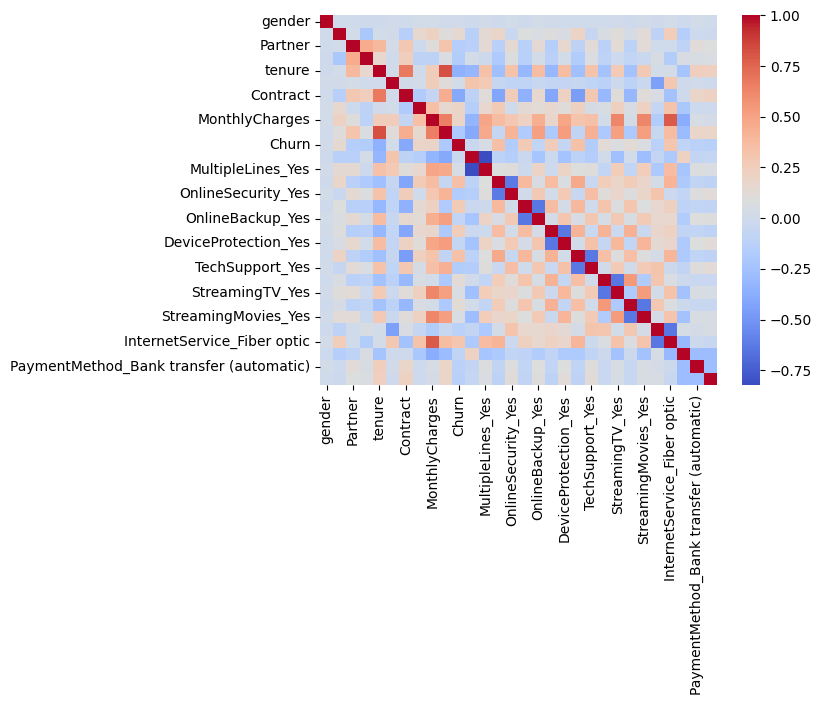

In [468]:
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm')

In [469]:
corr['Churn']

gender                                     0.008545
SeniorCitizen                              0.150541
Partner                                   -0.149982
Dependents                                -0.163128
tenure                                    -0.354049
PhoneService                               0.011691
Contract                                  -0.396150
PaperlessBilling                           0.191454
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
MultipleLines_No                          -0.032654
MultipleLines_Yes                          0.040033
OnlineSecurity_No                          0.342235
OnlineSecurity_Yes                        -0.171270
OnlineBackup_No                            0.267595
OnlineBackup_Yes                          -0.082307
DeviceProtection_No                        0.252056
DeviceProtection_Yes                      -0.066193
TechSupport_

# prelim biz insights from analysis

# Contract, tenure, OnlineSecurity_No, TechSupport_No all have highest correlation above 0.33 in magnitude. tenure and contract is negative and the other 2 are positive. this means
- the longer the contract or tenure, the lower to churn (makes sense) --> could promote this via like discounts/deals for curr customers on month-to-month contract or one year contract to upgrade their plan. or rewarding longterm customers or offering some incentives to odrive lifelong subscriptions (multi year deals) and advertising those campaigns/deals more.
- those who have internet but say no to online security or say no to tech support are more likely to churn/leave. this could mean that online security and tech support are good for customer satisfaction and quality of product if that maeks sense. so could offer stats about that in advertising and mayb eoffer bundle deals that make internet + online security and/or tech support cheaper than it currently is to encourage them to say yes. or having like sales reps regularly check in / send compelling ads to. could have like a grid with all featuers offered  and the price for each. ALSO could offer a deal that makes online security + tech support free or reduced price for first year or x months.

- bundles, intro discounts, upgrade paths, loyalty perks

reminder: predict behavior to retain customers. dev focused customer retention programs.

#### 4. Baseline — simple logistic/linear or heuristic.... / Validation — proper split/CV; report ROC-AUC (class)

In [470]:
# split 80/20 into train/test

X = df.copy().drop(columns = 'Churn')
y = df['Churn'].copy()
trainX, testX, trainY, testY = skl.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

In [471]:
def compare_cv_model(model):
    
    cv = skl.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = skl.model_selection.cross_validate(model, trainX, trainY.squeeze(), cv = cv, scoring = ('roc_auc', 'average_precision'))
    print(f'{model} Report:')
    cv_roc_auc = scores["test_roc_auc"].mean()
    cv_average_precision = scores["test_average_precision"].mean()
    print(f'CV ROC AUC: {cv_roc_auc:.3f}') # prob model ranks a random churner above a random non-churner (accuracY??)
    print(f'CV Average Precision (PR AUC): {cv_average_precision:.3f}') # area under the precision–recall curve; compare to the base churn rate
    
lr = skl.linear_model.LogisticRegression(max_iter = 1000, class_weight = 'balanced')
compare_cv_model(lr)

LogisticRegression(class_weight='balanced', max_iter=1000) Report:
CV ROC AUC: 0.847
CV Average Precision (PR AUC): 0.658


#### 5. Models — try others (justify choices - TODO:)

In [472]:
# logistic regression

gb = skl.ensemble.GradientBoostingClassifier()
rf = skl.ensemble.RandomForestClassifier()
compare_cv_model(gb)
compare_cv_model(rf)

GradientBoostingClassifier() Report:
CV ROC AUC: 0.848
CV Average Precision (PR AUC): 0.666
RandomForestClassifier() Report:
CV ROC AUC: 0.824
CV Average Precision (PR AUC): 0.621


ok so winner is Gradient Boosting Classifier!

now to report on test data! in depth into gradient boosting classifier

In [ ]:
# first report AUCs on test for LogReg and GBC just to see

def eval_on_test(model):
    
    print(f'Eval of {model} on test set')
    model.fit(trainX, trainY.squeeze())
    assert list(model.classes_) == [0, 1]
    probs = model.predict_proba(testX)[:, 1]
    test_roc_auc = skl.metrics.roc_auc_score(y_true = testY, y_score = probs) # report aucs
    test_pr_auc = skl.metrics.average_precision_score(y_true = testY, y_score = probs) # report aucs
    print(f'ROC AUC: {test_roc_auc}')
    print(f'Avg Precision Score or PR AUC: {test_pr_auc}')
    return probs
    
eval_on_test(lr)
gb_probs = eval_on_test(gb)

Eval of LogisticRegression(class_weight='balanced', max_iter=1000) on test set
ROC AUC: 0.8323920257181462
Avg Precision Score / PR AUC: 0.6292482617075056
Eval of GradientBoostingClassifier() on test set
ROC AUC: 0.8330455917296075
Avg Precision Score / PR AUC: 0.6474903114440358


- Deep-dive only for the winner:
- ---- Lift@20%
- ---- Confusion matrix at one decision rule (pick Top-20% or 0.50), + Precision/Recall/F1.
- ---- Drivers: LogReg → odds ratios; Booster → feature importance (+ 1 SHAP example if time).

In [474]:
# Lift@20% for Gradient Booster

top20mask = gb_probs >= np.quantile(gb_probs, 0.8)
top20rate = testY[top20mask].mean()
base_rate = testY.mean()
lift20 = top20rate / base_rate
print("our model's top-20% highest risk churn customers have a true churn rate of")
print(f'{lift20:.3} greater than that of the entire customer base')

our model's top-20% highest risk churn customers have a true churn rate of
2.44 greater than that of the entire customer base


In [ ]:
# Confusion matrix for Top-20% for Gradient Booster. prec/recall/f1 too

# first cast top-20% as ones
top20preds = np.zeros_like(testY)
top20preds[top20mask] = 1

cm = skl.metrics.confusion_matrix(y_true = testY, y_pred = top20preds)
precision = skl.metrics.precision_score(y_true = testY, y_pred = top20preds)
recall = skl.metrics.recall_score(y_true = testY, y_pred = top20preds)
f1 = skl.metrics.f1_score(y_true = testY, y_pred = top20preds)

print(f'Confusion Matrix: \n{cm}\nPrecision: {precision}\n Recall: {recall}\n F1: {f1}')
# TP FP
# FN TN

Confusion Matrix: 
[[934  99]
 [191 183]]
Precision: 0.648936170212766
 Recall: 0.4893048128342246
 F1: 0.5579268292682927


Note that for a business problem like this where we are doing, Recall has a ceiling (in this case 20/26 =77%)

In [ ]:
# out of curiosity - exclude from report
threshold_preds = np.zeros_like(testY)
thresh50mask = gb_probs >= 0.5
threshold_preds[thresh50mask] = 1
print("base pred rate:", threshold_preds.mean())

thresh_cm = skl.metrics.confusion_matrix(y_true = testY, y_pred = threshold_preds)
thresh_precision = skl.metrics.precision_score(y_true = testY, y_pred = threshold_preds)
thresh_recall = skl.metrics.recall_score(y_true = testY, y_pred = threshold_preds)
thresh_f1 = skl.metrics.f1_score(y_true = testY, y_pred = threshold_preds)

print(f'Confusion Matrix: \n{thresh_cm}\nPrecision: {thresh_precision}\n Recall: {thresh_recall}\n F1: {thresh_f1}')
# TP FP
# FN TN

base pred rate: 0.2103766879886283
Confusion Matrix: 
[[929 104]
 [182 192]]
Precision: 0.6486486486486487
 Recall: 0.5133689839572193
 F1: 0.573134328358209


In [ ]:
# Drivers for Gradient Booster: feature importance / SHAP example

# NOTE TO SEL F- add base churn rate, number customers etc. summary stats at top of notebook

# tree based importance???
pd.Series(gb.feature_importances_, index=trainX.columns).sort_values(ascending = False)

Contract                                   0.401923
tenure                                     0.158863
MonthlyCharges                             0.094036
InternetService_Fiber optic                0.085779
OnlineSecurity_No                          0.069512
TotalCharges                               0.065370
TechSupport_No                             0.051730
PaperlessBilling                           0.013514
SeniorCitizen                              0.011052
MultipleLines_No                           0.008375
PaymentMethod_Credit card (automatic)      0.006023
StreamingMovies_Yes                        0.005665
StreamingTV_Yes                            0.004595
PaymentMethod_Mailed check                 0.003980
OnlineBackup_No                            0.003870
InternetService_DSL                        0.003296
PhoneService                               0.003039
Dependents                                 0.002964
gender                                     0.001336
PaymentMetho

In [492]:
# pip install shap

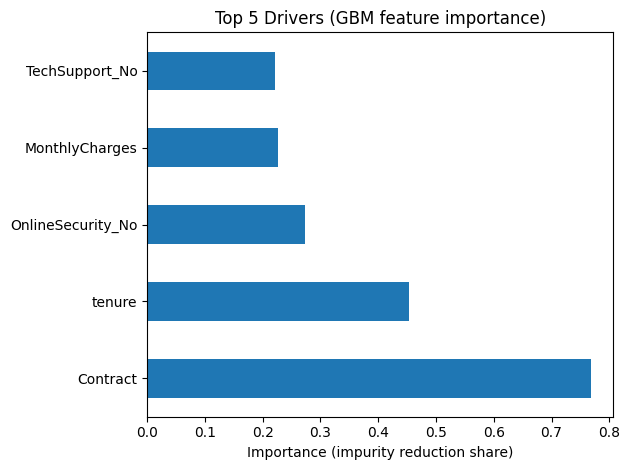

In [506]:
# global SHAP
import shap

explainer = shap.TreeExplainer(gb)
sv = explainer.shap_values(testX)
global_shap = pd.Series(np.abs(sv).mean(axis=0), index=testX.columns).sort_values(ascending=False).head()
plt.figure()
global_shap.plot(kind='barh')
plt.title("Top 5 Drivers (GBM feature importance)")
plt.xlabel("Importance (impurity reduction share)")
plt.tight_layout()
plt.show()

In [ ]:
# One high-risk example’s top reasons
i = int(np.argmax(gb_probs))
person = pd.Series(sv[i], index=testX.columns).sort_values(key=np.abs, ascending=False)
print("Example customer P(churn)=", gb_probs[i].round(3))
print("Top + reasons:\n", person[person>0].head(5))
print("Top – reasons:\n", person[person<0].head(5))

# e.g. this high risk customer would be offered the tenure perk

Example customer P(churn)= 0.906
Top + reasons:
 tenure               1.183901
Contract             0.881357
MonthlyCharges       0.391305
TechSupport_No       0.266963
OnlineSecurity_No    0.247668
dtype: float64
Top – reasons:
 SeniorCitizen                             -0.034779
PhoneService                              -0.012611
PaymentMethod_Bank transfer (automatic)   -0.006525
OnlineSecurity_Yes                        -0.004772
DeviceProtection_Yes                      -0.001109
dtype: float64


In [510]:
sv

array([[ 1.42656274e-02,  1.85576712e-01,  6.69523731e-04, ...,
         2.90454027e-02, -6.26667672e-02, -1.07516009e-02],
       [-1.32826664e-03, -5.97082646e-02, -9.97099348e-04, ...,
         5.16357156e-02, -4.40475271e-02,  5.58229452e-03],
       [ 2.19497546e-04, -4.18297974e-02,  1.07681473e-02, ...,
         2.95007164e-02,  1.51320485e-02, -2.27633738e-01],
       ...,
       [-3.25620501e-03, -4.53406760e-02, -9.97099348e-04, ...,
        -1.60757555e-01,  1.92481697e-02,  4.44944410e-02],
       [-8.58294296e-03,  1.85370268e-01, -9.82024703e-03, ...,
         2.53765541e-02, -6.03479530e-02,  4.64148700e-03],
       [-1.55168919e-02, -2.69391871e-02,  6.69523731e-04, ...,
         4.73427080e-02, -6.16027689e-02,  1.63396924e-03]])

PERKS' WE'LL OFFER

We’ll assign one offer per high-risk customer using a simple priority to avoid overlap:

Contract upgrade (MTM or very short tenure)

Rule: Contract == Month-to-month OR tenure < 6 months

Offer: 1–2 mo bill credit if upgrading to 12- or 24-month plan (+ keep paperless/autopay).

Bill review / right-size (high charges)

Rule: MonthlyCharges in top quartile (≥ 75th percentile)

Offer: plan optimization + small targeted credit (e.g., $10–$20) if they accept right-size.

Add-on bundle trial (missing support/security)

Rule: TechSupport_No == 1 OR OnlineSecurity_No == 1

Offer: bundle trial 2–3 months free, easy opt-out, then discounted add-on.

Fiber loyalty (fiber + high charges)

Rule: InternetService_Fiber optic == 1 AND high MonthlyCharges

Offer: loyalty add-on or bundle discount to increase perceived value.

#### 7. Explainability — feature importance + 2–3 “so-what” insights.

#### 8. Business recs — 3 insights, 2 actions, risks, next data.

#### 9. Reproducibility — README (how to run), requirements, clear section headers.

#### 10. Communication — concise slides: Problem/Data → Baseline vs Model → Drivers → Recs.

In [ ]:
df.

SyntaxError: invalid syntax (791285630.py, line 1)